**Importing the Libraries**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Loading the Dataset**

In [3]:
df = sns.load_dataset("titanic")

In [4]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* **mpg** = **Miles-Per-Gallon**(British measure of fuel consumption. Indicates how many miles the vehicle has traveled on 1 gallon of petrol/diesel.)
* **cylinders** = Number of **cylinders** in the **engine** (The back and forth movement of the pistons in the cylinders creates the energy that makes the engine work.)
* **displacement** = **Engine displacement** is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement from top dead centre (TDC) to bottom dead centre (BDC).
* **horsepower** = It is the most important key that provides information about the performance of a motor vehicle.
* **weight** = Vehicle's weight
* **acceleration** = Vehicle's acceleration
* **model_year** = Model of the vehicle
* **origin** = Vehicle's origin
* **name** = Vehicle's name

**Initial Analysis on the Dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [6]:
df.drop(["embarked", "class", "alive"], axis = 1, inplace = True)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,NaN,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,C,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,NaN,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,C,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,NaN,Southampton,True


**Exploratory Data Analysis(EDA)**

In [8]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)

In [9]:
null_num

[0, 0, 0, 177, 0, 0, 0, 0, 0, 688, 2, 0]

In [10]:
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
who,0
adult_male,0
deck,688


<Axes: xlabel='deck', ylabel='count'>

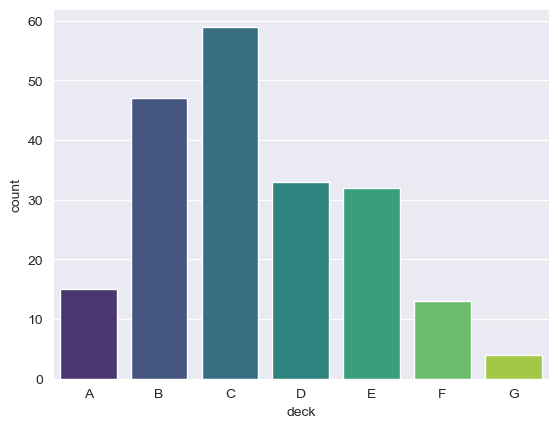

In [11]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", data = df, palette = "viridis")

<Axes: xlabel='deck', ylabel='count'>

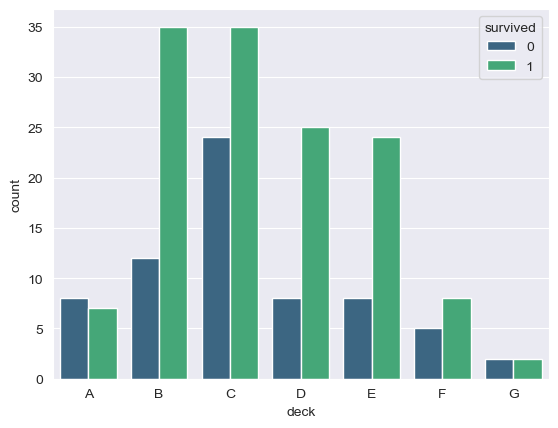

In [12]:
sns.set_style("darkgrid")
sns.countplot(x = "deck", hue= "survived", data = df, palette = "viridis")

In [13]:
df.drop(["deck"], axis = 1, inplace = True)

In [14]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,man,True,Southampton,True


<Axes: xlabel='pclass', ylabel='age'>

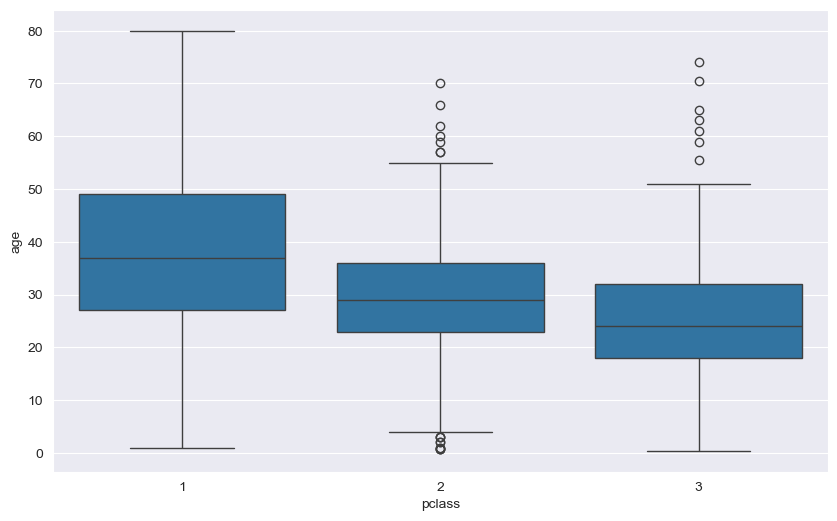

In [15]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = "pclass", y = "age", data = df)

In [16]:
def fillna_age(columns):
    age = columns[0]
    pclass = columns[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 29
        else:
            return 23
    else:
        return age

In [17]:
df.age = df[["age", "pclass"]].apply(fillna_age, axis = 1)

In [18]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,2


In [19]:
df.dropna(inplace = True)

In [20]:
null_num = []
for i in df.columns:
    x = df[i].isnull().sum()
    null_num.append(x)
    
pd.DataFrame(null_num, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
who,0
adult_male,0
embark_town,0


<Axes: xlabel='survived', ylabel='count'>

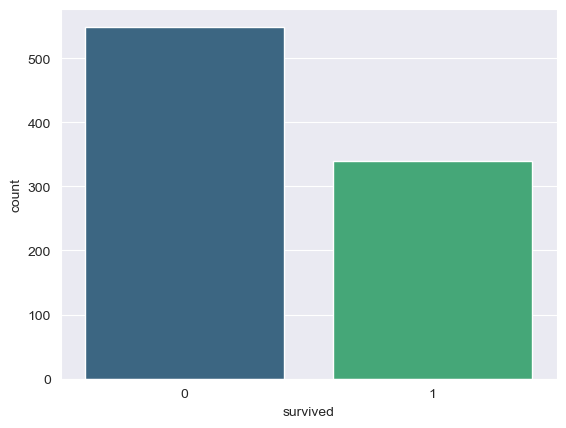

In [21]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", data = df, palette = "viridis")

In [22]:
df.survived.value_counts()

survived
0    549
1    340
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

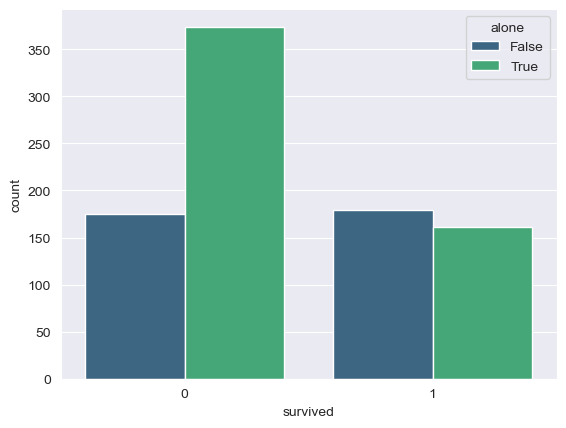

In [23]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "alone", data = df, palette = "viridis")

<Axes: xlabel='survived', ylabel='count'>

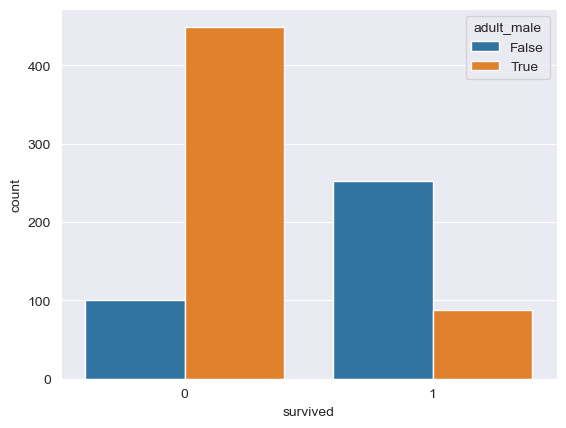

In [24]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "adult_male", data = df)

<Axes: xlabel='survived', ylabel='count'>

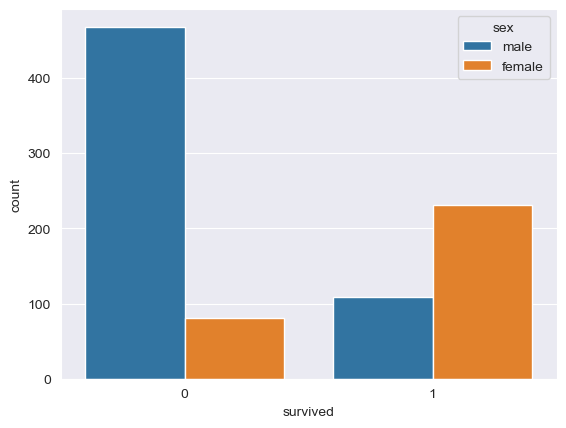

In [25]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "sex", data = df)

<Axes: xlabel='survived', ylabel='count'>

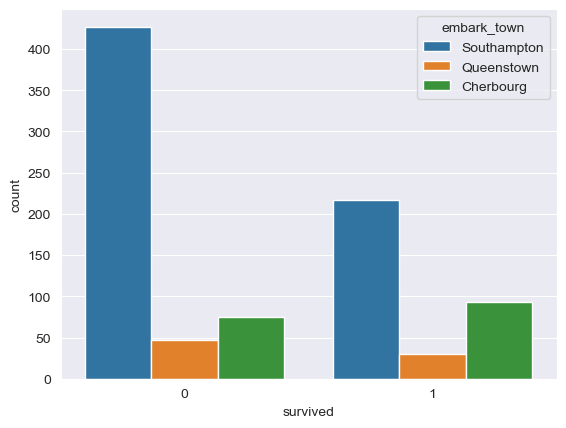

In [26]:
sns.set_style("darkgrid")
sns.countplot(x = "survived", hue= "embark_town", data = df)

In [27]:
df.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

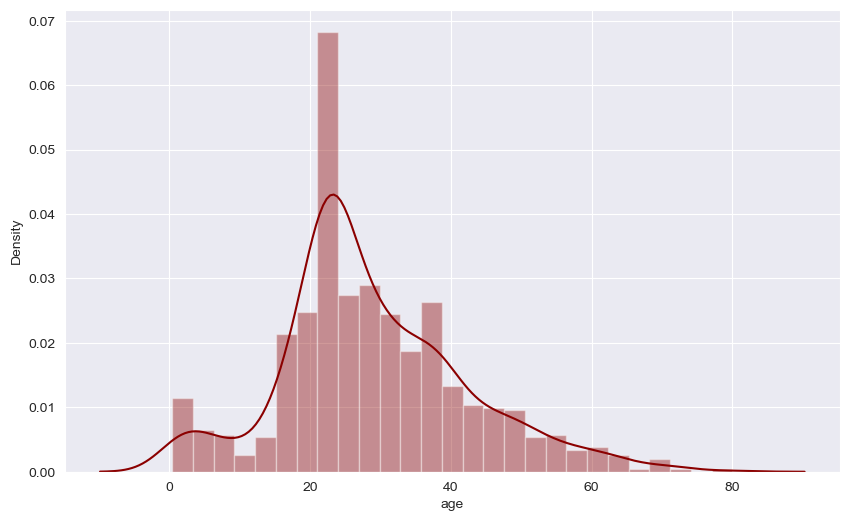

In [28]:
plt.figure(figsize = (10, 6))
sns.distplot(df["age"], color = "darkred")

<Axes: xlabel='fare', ylabel='Density'>

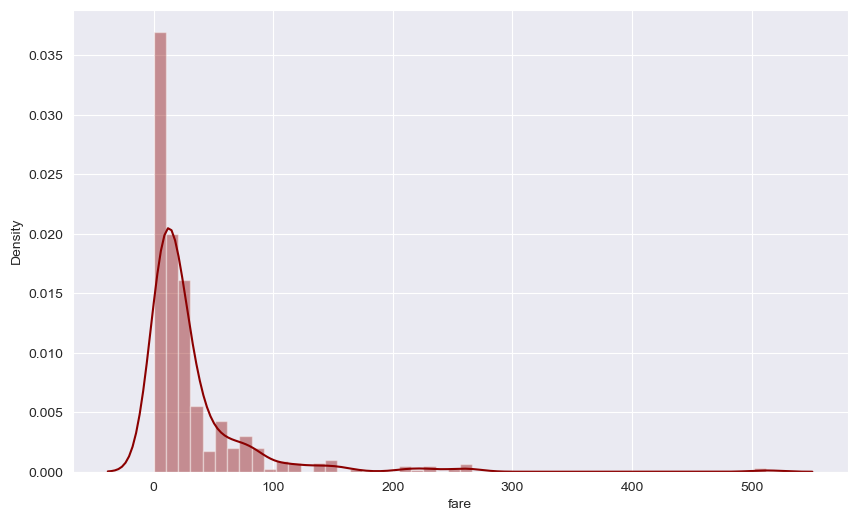

In [29]:
plt.figure(figsize = (10, 6))
sns.distplot(df["fare"], color = "darkred")

<Axes: >

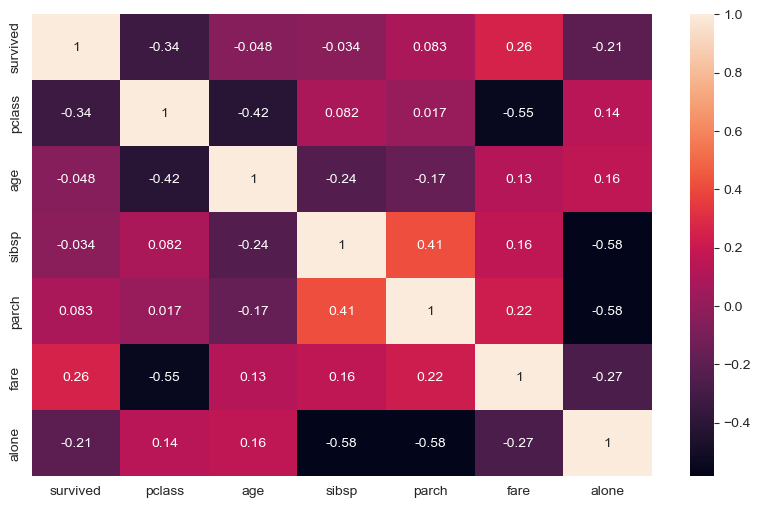

In [30]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.drop(["sex","who","adult_male","embark_town"], axis=1).corr(), annot = True)

In [31]:
df.drop(["age", "sibsp", "parch"], axis = 1, inplace = True)

In [32]:
df.head()

,survived,pclass,sex,fare,who,adult_male,embark_town,alone
0,0,3,male,7.2500,man,True,Southampton,False
1,1,1,female,71.2833,woman,False,Cherbourg,False
2,1,3,female,7.9250,woman,False,Southampton,True
3,1,1,female,53.1000,woman,False,Southampton,False
4,0,3,male,8.0500,man,True,Southampton,True


**Modelling**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [44]:
X = df.drop(['survived'], axis=1)  # Use all available features except 'survived'
y = df["survived"]

# Handle categorical variables by converting them to dummy variables
X = pd.get_dummies(X, columns=["sex", "who", "embark_town", "alone"], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       109
           1       0.72      0.81      0.76        69

    accuracy                           0.80       178
   macro avg       0.79      0.80      0.80       178
weighted avg       0.81      0.80      0.81       178



In [47]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [48]:
cnf_matrix

array([[87, 22],
       [13, 56]], dtype=int64)

**Goodbye**